In [74]:
%matplotlib inline

# Bokeh for interactive, Seaborn for static

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

sns.set(style="whitegrid", palette="pastel")
# sns.set(style="whitegrid", palette=sns.color_palette("RdBu", n_colors=2))

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

from math import pi
import glob

In [78]:
num_obst = 0

if num_obst == 0:
    fsm_fullfile = '/Users/ajc/Documents/projects/adabot/adabot02-ann/animations/fsm-0-1_best.csv'
    bnn_fullfile = '/Users/ajc/Documents/projects/adabot/adabot02-ann/animations/bnn-0-1_best.csv'
#     tws_fullfile = '/Users/ajc/Documents/projects/adabot/adabot02-ann/animations/bnn_twist-0-1_best.csv'
else:
    fsm_fullfile = '/Users/ajc/Documents/projects/adabot/adabot02-ann/animations/.csv'
    bnn_fullfile = '/Users/ajc/Documents/projects/adabot/adabot02-ann/animations/.csv'
    tws_fullfile = '/Users/ajc/Documents/projects/adabot/adabot02-ann/animations/.csv'


df_fsm = pd.read_csv(fsm_fullfile, sep=' ')
df_bnn = pd.read_csv(bnn_fullfile, sep=' ')
# df_tws = pd.read_csv(tws_fullfile, sep=' ')

# df.describe()

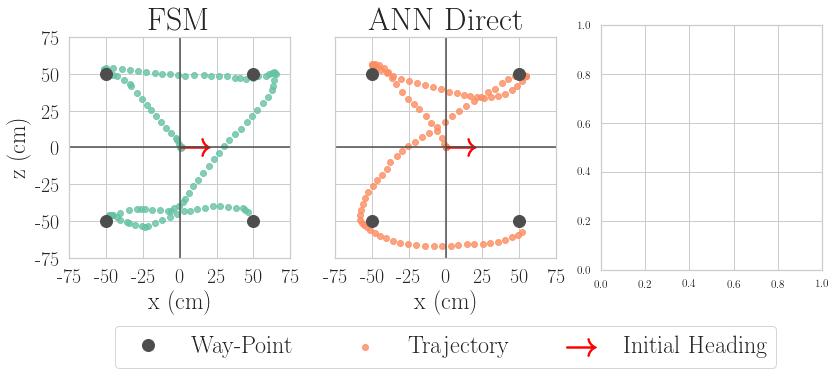

In [79]:
ticksize = 20
labelsize = 24
legendsize = labelsize
titlesize = 32

ncols = 3
fig, ax = plt.subplots(nrows=1, ncols=ncols, figsize=(ncols * 4.5, 4.5))
colors = sns.color_palette(['#1b9e77','#d95f02','#7570b3','#66c2a5','#fc8d62','#8da0cb'])

def plot_trajectory(df, title, ax, color, left_axis=False):
    
    ax_min, ax_max = -75, 75
    ax_padding = (ax_max - ax_min) * 0
    ax_lims_with_padding = [ax_min - ax_padding, ax_max + ax_padding]
    ax.set_ylim(ax_lims_with_padding)
    ax.set_xlim(ax_lims_with_padding)

    # Prettify the lines and ticks
    ax_ticks = np.linspace(ax_min, ax_max, num=7);
    ax.set_xticks(ax_ticks);
    ax.set_xticklabels([int(ax_val) for ax_val in ax_ticks], fontsize=ticksize);
    
    ax.set_yticks(ax_ticks);
    if left_axis:
        ax.set_yticklabels([int(ax_val) for ax_val in ax_ticks], fontsize=ticksize);
    else:
        ax.set_yticklabels([]);

    # Plot trajectory
    sns.regplot(x=df['x']*100, y=df['z']*100, fit_reg=False, ax=ax, color=color)

    # Draw initial orientation
    # ax.arrow(0, 0, 10, 0, head_width=7, head_length=7, fc='red', ec='red', label='Initial Heading')
    ax.scatter(10, 0, c='red', marker=r'$\rightarrow$', s=1000, label='arrow')

    # Add origin axes
    ax.plot([0, 0], ax_lims_with_padding, color='0.3', linestyle='-', linewidth=1.5, label='_nolegend_')
    ax.plot(ax_lims_with_padding, [0, 0], color='0.3', linestyle='-', linewidth=1.5, label='_nolegend_')

    # Add targets
    ax.plot( 50,  50, 'o', color='0.3', markersize=12)
    ax.plot(-50,  50, 'o', color='0.3', markersize=12, label='_nolegend_')
    ax.plot( 50, -50, 'o', color='0.3', markersize=12, label='_nolegend_')
    ax.plot(-50, -50, 'o', color='0.3', markersize=12, label='_nolegend_')
    
    ax.set_title(title, fontsize=titlesize)
    ax.set_xlabel('x (cm)', fontsize=labelsize)
    
    if left_axis:
        ax.set_ylabel('z (cm)', fontsize=labelsize)
    else:
        ax.set_ylabel('')
    
    ax.set_aspect('equal', 'box')


    
plot_trajectory(df_fsm, 'FSM', ax[0], colors[3] if num_obst == 0 else colors[0], True)
plot_trajectory(df_bnn, 'ANN Direct', ax[1], colors[4] if num_obst == 0 else colors[1])
# plot_trajectory(df_bnn, 'ANN Twist', ax[2], colors[5] if num_obst == 0 else colors[2])

lgd = ax[1].legend(('Way-Point', 'Trajectory', 'Initial Heading')
                   , fontsize=legendsize
                   , loc=9
                   , bbox_to_anchor=(0.5, -0.25)
#                    , loc='lower center'
#                    , mode='expand'
#                    , bbox_to_anchor=(1, 0)
#                    , frameon=False
                   , ncol=3
                  )

# sns.despine(top=True, right=True, left=True, bottom=True)
# plt.tight_layout()

In [72]:
fig.savefig('../paper/figures/4-results/0-1-best_trajectories.png', 
            bbox_extra_artists=(lgd,), bbox_inches='tight')

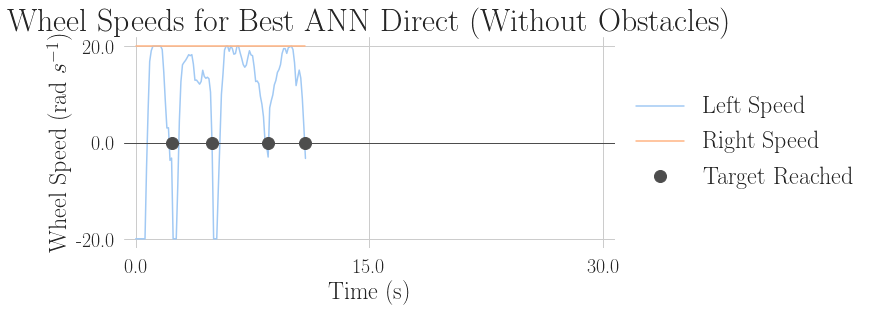

In [86]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9*1.3, 4.5))

exp_name = 'bnn'

title = 'Wheel Speeds for Best '
if exp_name == 'fsm':
    df = df_fsm
    title += 'FSM'
elif exp_name == 'bnn':
    df = df_bnn
    title += 'ANN Direct'
else:
    df = df_tws
    title += 'ANN Twist'

title += ' (Without Obstacles)' if num_obst == 0 else ' (With Obstacles)'
max_time = 12 if num_obst == 0 else 30

final_time = df['time'].max()

plt.plot(df['time'], df[['left_speed', 'right_speed']])# * -1)

# Prettify the lines and ticks
x_min, x_max = 0, 30
x_padding = (x_max - x_min) * 0.025
x_lims_with_padding = [x_min - x_padding, x_max + x_padding]
ax.set_xlim(x_lims_with_padding)

x_ticks = np.linspace(x_min, x_max, num=3);
ax.set_xticks(x_ticks);
ax.set_xticklabels([round(x_val, 1) for x_val in x_ticks], fontsize=ticksize);

y_min, y_max = -20, 20
y_padding = (y_max - y_min) * 0.05
y_lims_with_padding = [y_min - y_padding, y_max + y_padding]
ax.set_ylim(y_lims_with_padding)

y_ticks = np.linspace(y_min, y_max, num=3);
ax.set_yticks(y_ticks);
ax.set_yticklabels([round(y_val, 2) for y_val in y_ticks], fontsize=ticksize);

target_times = df['target_idx'].diff()[df['target_idx'].diff() != 0].index.values
for t_idx in (list(target_times[1:]) + [df.shape[0] - 1]):
    t = df['time'][t_idx]
    ax.plot(t, 0, 'o', color='0.3', markersize=12)
#     ax.plot([t, t], y_lims_with_padding, color='0.3', linestyle='--', linewidth=1)

    
ax.plot(x_lims_with_padding, [0, 0], color='0.3', linestyle='-', linewidth=1)

ax.set_title(title, fontsize=titlesize)
ax.set_ylabel('Wheel Speed (rad $s^{-1}$)', fontsize=labelsize)
ax.set_xlabel('Time (s)', fontsize=labelsize)
lgd = ax.legend(('Left Speed', 'Right Speed', 'Target Reached'), 
                fontsize=legendsize, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)

sns.despine(top=True, right=True, left=True, bottom=True)
plt.tight_layout()

In [11]:
fig.savefig('../paper/figures/4-results/FSM-40-2-best_speed.png', 
            bbox_extra_artists=(lgd,), bbox_inches='tight')

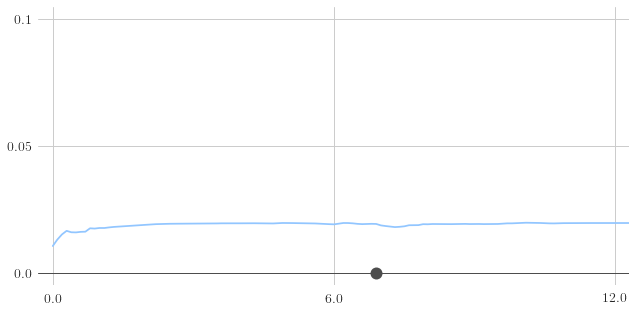

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,4.5))

final_time = df['time'].max()

plt.plot(df['time'], df['weg_extension'])

# Prettify the lines and ticks
x_min, x_max = 0, 12
x_padding = (x_max - x_min) * 0.025
x_lims_with_padding = [x_min - x_padding, x_max + x_padding]
ax.set_xlim(x_lims_with_padding)

x_ticks = np.linspace(x_min, x_max, num=3);
ax.set_xticks(x_ticks);
ax.set_xticklabels([round(x_val, 1) for x_val in x_ticks], fontsize=14);

y_min, y_max = 0, .1
y_padding = (y_max - y_min) * 0.05
y_lims_with_padding = [y_min - y_padding, y_max + y_padding]
ax.set_ylim(y_lims_with_padding)

y_ticks = np.linspace(y_min, y_max, num=3);
ax.set_yticks(y_ticks);
ax.set_yticklabels([round(y_val, 2) for y_val in y_ticks], fontsize=14);

target_times = df['target_idx'].diff()[df['target_idx'].diff() != 0].index.values
for t_idx in (list(target_times[1:]) + [df.shape[0] - 1]):
    t = df['time'][t_idx]
    ax.plot(t, 0, 'o', color='0.3', markersize=12)
#     ax.plot([t, t], y_lims_with_padding, color='0.3', linestyle='--', linewidth=1)

    
ax.plot(x_lims_with_padding, [0, 0], color='0.3', linestyle='-', linewidth=1)

# ax.set_title('Wheel Speeds for the Best Evolved ANN', fontsize=24)
# ax.set_ylabel('Wheel Speed (rad $s^{-1}$)', fontsize=18)
# ax.set_xlabel('Time (s)', fontsize=18)
# ax.legend(('Left Speed', 'Right Speed', 'Target Reached'), fontsize=18, loc='center left', bbox_to_anchor=(1, 0.5))

sns.despine(top=True, right=True, left=True, bottom=True)
plt.tight_layout()